<a href="https://colab.research.google.com/github/sshreyaaah/CODE_COLLAB/blob/main/Unsupervised_ML_Capstone_Topic_Modeling_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Topic Modeling on News Articles**



# **Project Summary**

Topic modelling is a widely used technique in natural language processing that helps to extract topics from a large collection of documents. The algorithm analyzes the text data and identifies patterns of co-occurring words, thereby grouping similar words into topics. Two popular algorithms used for topic modelling are Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA). Both algorithms attempt to identify the underlying themes in the dataset by uncovering the latent semantic structure in the text.

In this project, the dataset from individual text files are read and consolidated into a single DataFrame with three columns - Title, Description and the Category. The Description column is carried forward for textual pre-processing, while the Category column provided as input is used to evaluate the accuracy of the model.

Firstly, the LDA algorithm is utilised to perform topic modelling on the BBC News dataset. The dataset is pre-processed by expanding contractions, removing punctuations, digits, whitespaces and stop words. Then Lemmatization is used to group together words to the word's lemma.  The pre-processed data is then vectorized using the CountVectorizer from the scikit-learn library. On the vectorized data, the LDA algorithm is applied using Hyperparameter Tuning to identify the underlying topics in the dataset

Additionally, the LDA model is re-applied by using the TfidfVectorizer to vectorize the pre-processed dataset to study the variation in accuracy. A Null Hypotheses that using the CountVectorizer to tokenise input data for an LDA model provides more accurate results, over the TFIDF Vectorizer, is established. An LSA model is also applied on two tokenised inputs of the datasets - one using CountVectorizer and the other using TFIDFVectorizer - as a third model for the project. The LSA algorithm uses the truncated singular value decomposition (SVD) technique to reduce the dimensionality of the dataset and create a topic-term matrix. The topic-term matrix represents the weight of each term in each topic.

After identifying the latent topics, the models are evaluated by verifying whether these topics correspond to the different tags available as input. The identified topics are compared with the original tags for each article by using metrics such as Accuracy and individual topic precisions, recalls and F1 Scores. Finally, word-clouds are generated for each topic to better understand the most frequent words in each topic and whether they actually correspond to that topic or not.

After evaluation, it is found that the LDA model using the CountVectorizer has the highest accuracy (~93%). The F1 Score is relatively higher with highest at 97% for Sport, and lowest at ~90% for Politics. The LDA model with TfidfVectorizer had a lower accuracy, with a maximum accuracy of ~85%. It over-determined Entertainment Topic resulting in a low Precision score. The LSA model had a much lower accuracy in each iteration, owing to the over-determination on one topic.

One direction in which future work can be carried out is to refine the stop word removal to reduce the dimensionality of the problem further. Also, more Hyperparameters can be tuned to increase the model performance. Further scope such as utilising other Topic Modeling algorithms and Topic evolution are discussed in the notebook below.

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Topic Modeling is of extreme import in the current world, and it applies in context of News Articles as well. News Articles have latent topics hidden in them only discernible by a proper reading analysis of the articles. Topic modeling automatically categorises news articles into various categories of requirement. This can be very useful for the news organisations to manage their content and for readers to easily find articles of their interest.

Also, news articles can be lengthy and contain a lot of redundant information. Topic Modeling helps in Content Summarisation thereby extracting the most important keywords and themes to help summarise the content in a concise and informative manner.

While there are several other applications of Topic Modeling, in this project the focus is on finding an optimum model which categorises the articles into five latent topics, namely Politics, Business, Tech, Sports and Entertainment. The category to which each article originally belongs to is also provided as an input to compare with the results from the model for evaluation.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import glob
import re
import csv

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD

### Dataset Loading

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*   For loading the dataset, the **glob** and **re** libraries were used. While reading the data, each paragraph was read into a different row with the column index being the title.
*   This data was organised into three features - the first column named "**Title**", the rest of the article in "**Description**" and the category assigned to the article in "Category" column
*   Articles from each category were stored in separate DataFrames (for any furture usage), and all were concatenated to form a single final DataFrame


In [4]:
# Function for organising one article into 'Title' and 'Description' Columns
def organise_data(df):
  df['Description'] = ''
  for row in df[df.columns.values[0]]:
    df['Description'] += ' ' + row
  df['Title'] = df.columns.values[0]
  df = pd.DataFrame(df[['Title', 'Description']].loc[0]).transpose()
  return df

# Function for reading files from one particular category
def read_from_folder(category, path):
  # Reading the first file in the new DataFrame for one particular category
  search_path = path + category + "/*.txt"
  print(f"Searching for files in: {search_path}")
  files = glob.glob(search_path)
  df = pd.DataFrame(pd.read_table(files[0]))
  df = organise_data(df)

  # Reading the rest of the files in the category, assigning a column for the given category name, and concatenating to the above DataFrame
  # Exception handling was used to handle Unicode and Parse Errors
  for i in range(1, len(files)):
    try:
      next_df = pd.DataFrame(pd.read_table(files[i]))
    except UnicodeDecodeError:
      next_df = pd.DataFrame(pd.read_table(files[i], encoding = 'ISO-8859-1'))
    except pd.errors.ParserError:
      next_df = pd.DataFrame(pd.read_table(files[i], quoting=csv.QUOTE_NONE))
    next_df = organise_data(next_df)
    df = pd.concat([df, next_df], axis=0)
    df['Category'] = category.capitalize()
    df = df.reset_index(drop=True)
  return df

# Function for reading files from all categories and concatenating into one single DataFrame
def read_from_folders(categories, path):
  category_dict = dict()
  for category in categories:
    category_dict[category] = read_from_folder(category, path)
  final_data = pd.concat([category_dict[category] for category in categories], axis=0).reset_index(drop=True)
  return final_data

In [5]:
path = '/content/drive/MyDrive/input.csv'
folders = ['business', 'entertainment', 'politics', 'sport', 'tech']

In [6]:
import os

# List the contents of your Google Drive directory
drive_path = '/content/drive/MyDrive/'
drive_contents = os.listdir(drive_path)
print(f"Contents of {drive_path}:")
for item in drive_contents:
    print(item)

# You can also check the contents of a specific folder, for example, 'business'
business_folder_path = os.path.join(drive_path, 'business')
if os.path.exists(business_folder_path):
    business_folder_contents = os.listdir(business_folder_path)
    print(f"\nContents of {business_folder_path}:")
    for item in business_folder_contents:
        print(item)
else:
    print(f"\nThe folder '{business_folder_path}' does not exist.")

Contents of /content/drive/MyDrive/:
shreya_singhal_resume.pdf
COMIC-CRAFT End-Term Report.pdf
COMIC-CRAFT End-Term Report_final (1).pdf
shreya_LOR_resume2.pdf
COMIC-CRAFT End-Term Report_final.pdf
the-oxford-dictionary-of-english-grammar-oxford-quick-reference-2nd_edition ( PDFDrive ).pdf
shreya_LOR_resume2-1.pdf
IMG-20250712-WA0007.jpg
shreya_resume_LOR_updated (1).pdf
shreya_resume_LOR_updated.pdf
shreya_singhal_resume
shreya_sighal_resume_SOP_LOR_ION.pdf
Colab Notebooks
archive (1)
input.csv

The folder '/content/drive/MyDrive/business' does not exist.


In [7]:
import pandas as pd

# Load CSV
csv_path = '/content/drive/MyDrive/input.csv'
df = pd.read_csv(csv_path)

# Prepare your lists for LDA
News = df['Description'].dropna().tolist()  # Text data
Type = df['Category'].dropna().tolist()     # Labels (if needed)

# Now News and Type are ready to be used in your topic modeling pipeline
print(f"Loaded {len(News)} news articles.")


Loaded 2225 news articles.


### Dataset First View

In [8]:
# To display the entirety of each row in the Dataset
pd.set_option('display.max_colwidth', None)

In [9]:
# Dataset First Look
df.head()

Unnamed: 0                              Title  \
0           0   India calls for fair trade rules   
1           1  Sluggish economy hits German jobs   
2           2   Indonesians face fuel price rise   
3           3  Court rejects $280bn tobacco case   
4           4   Dollar gains on Greenspan speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Description  \
0                                                                                                                                                                                                                                                                 india attend g7 meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g7 nation object subsidi agricultur make hard develop nation like india compet also call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order given india china integr global economi issu globalis term engag globalis mr chidambaram attend g7 meet part g20 group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock told confer india along china brazil south africa russia invit take part g7 meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g7 nation particular us blame surg cheap chines export countri tri use fix exchang rate wish make judgement mr chidambaram separ imf warn thursday india budget deficit larg would hamper countri econom growth forecast around 65 year march 2005 year march 2004 indian economi grew 85   
1                                                                                                                                                                                                                                     number peopl work europ largest economi risen tenth straight month growth remain stubborn slow german unemploy rose 7000 novemb 4464 million peopl 108 workforc season adjust rise show smaller rise expect govern measur encourag job creation began take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth 01 third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export also negat effect brunt unemploy still felt eastern part germani rate 188 unemploy stuck 4 million 

### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
df.shape

(2225, 4)

### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2225 non-null   int64 
 1   Title        2225 non-null   object
 2   Description  2225 non-null   object
 3   Category     2225 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
df.isna().sum()

Unnamed: 0     0
Title          0
Description    0
Category       0
dtype: int64

### What did you know about your dataset?

The dataset is a collection of articles from BBC News Agency. We have to identify and categorise the different latent topics present in it.

The following information was learnt from a basic analysis of the dataset
*   The dataset has **2225 rows** (articles) and **3 columns** (Title, Description and Category)
*   **100 duplicate rows/articles** are present in the dataset
*   No missing or null values are present

## **2. Understanding Your Variables**

In [14]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'Title', 'Description', 'Category'], dtype='object')

In [15]:
# Understanding the Category column
df['Category'].value_counts()

Category
Sport            511
Business         510
Politics         417
Tech             401
Entertainment    386
Name: count, dtype: int64

### Variables Description

*   Each column is a string object, each row describing each article from the BBC News Dataset
*   The columns were
  *   **Title** - Article title
  *   **Description** - The article content
  *   **Category** - Article category/tag (given as input)
*   The highest number of articles provided were from the Sports category (with 511 articles) and the lowest number belonging to that of Entertainment Category (with 386 articles) (**NOTE**: these numbers includes duplicate values which will be handled in Data Wrangling section)

### Check Unique Values

In [16]:
# Check Unique Values for Category column
print(f"There are {df['Category'].nunique()} unique entries in the Category column. They are - {df['Category'].unique()}")

There are 5 unique entries in the Category column. They are - ['Business' 'Entertainment' 'Politics' 'Sport' 'Tech']


## **3. Data Wrangling**

### Data Wrangling Code

Most of the Wrangling had to be done while reading the dataset itself. Also, due to absence of any null or missing values, here only **the duplicate values are removed** to make the Dataset ready for Natural Language Processing

In [17]:
# Making a copy of the original dataset
data = df.copy()

# Removing duplicate values
data.drop_duplicates(inplace=True, ignore_index = True)

In [18]:
data.shape

(2225, 4)

In [19]:
# Number of articles in each topic after duplicate removal
data['Category'].value_counts()

Category
Sport            511
Business         510
Politics         417
Tech             401
Entertainment    386
Name: count, dtype: int64

In [20]:
# Number of duplicates removed from each category
(df['Category'].value_counts() - data['Category'].value_counts()).sort_values()

Category
Sport            0
Business         0
Politics         0
Tech             0
Entertainment    0
Name: count, dtype: int64

### What all manipulations have you done and insights you found?

After removing the duplicate values, the dataset has been reduced to 2125 articles
*   The highest number of duplicate items were found in Tech Category. 54 articles from Tech were removed
*   Also, 7, 8, 14 and 17 articles were removed from Business, Sports, Politics and Entertainment Categories respectively - adding to a total of 100 as verified in the previous section

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - 1 - Bar plot of number of articles in each category

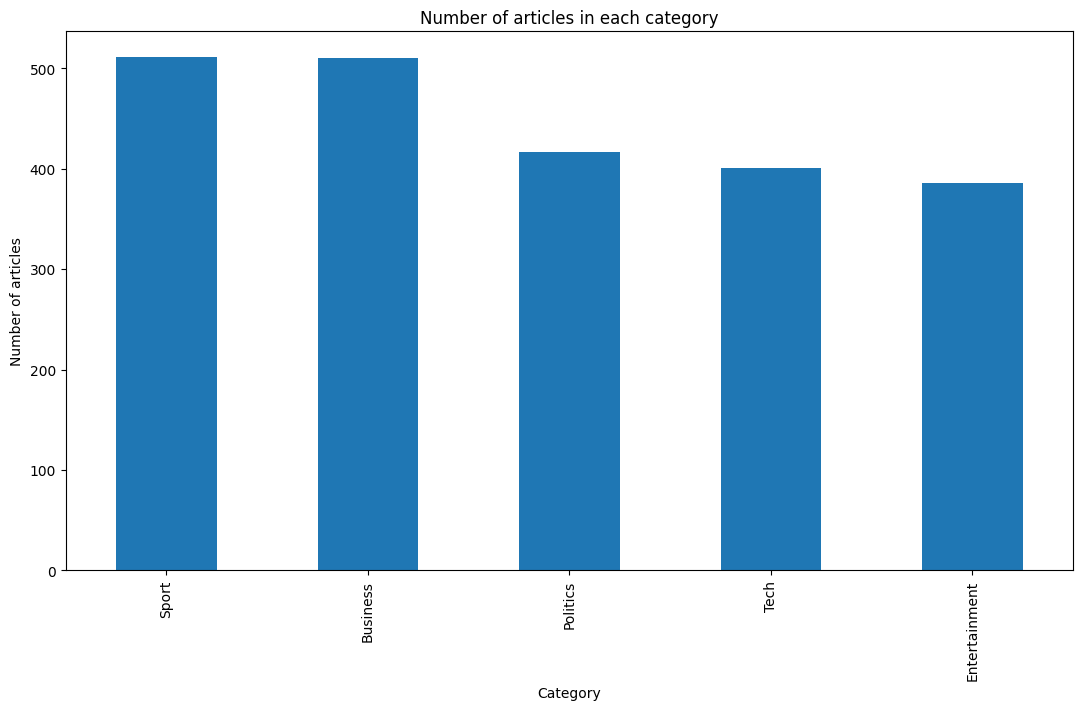

In [21]:
data['Category'].value_counts().plot(kind='bar', figsize = (13,7), title = 'Number of articles in each category', xlabel = 'Category', ylabel = 'Number of articles')
plt.show()

##### 1. Why did you pick the specific chart?

*   This bar plot was chosen to visually understand how the number of articles are distributed across the 5 given categories.

##### 2. What is/are the insight(s) found from the chart?

*   From the graph, it can be understood that Business and Sport categories have the highest number of articles after removing duplicate data, while Tech category had the lowest number of articles

#### Chart - 2 - Density plot for analysing the distribution of article length for each category

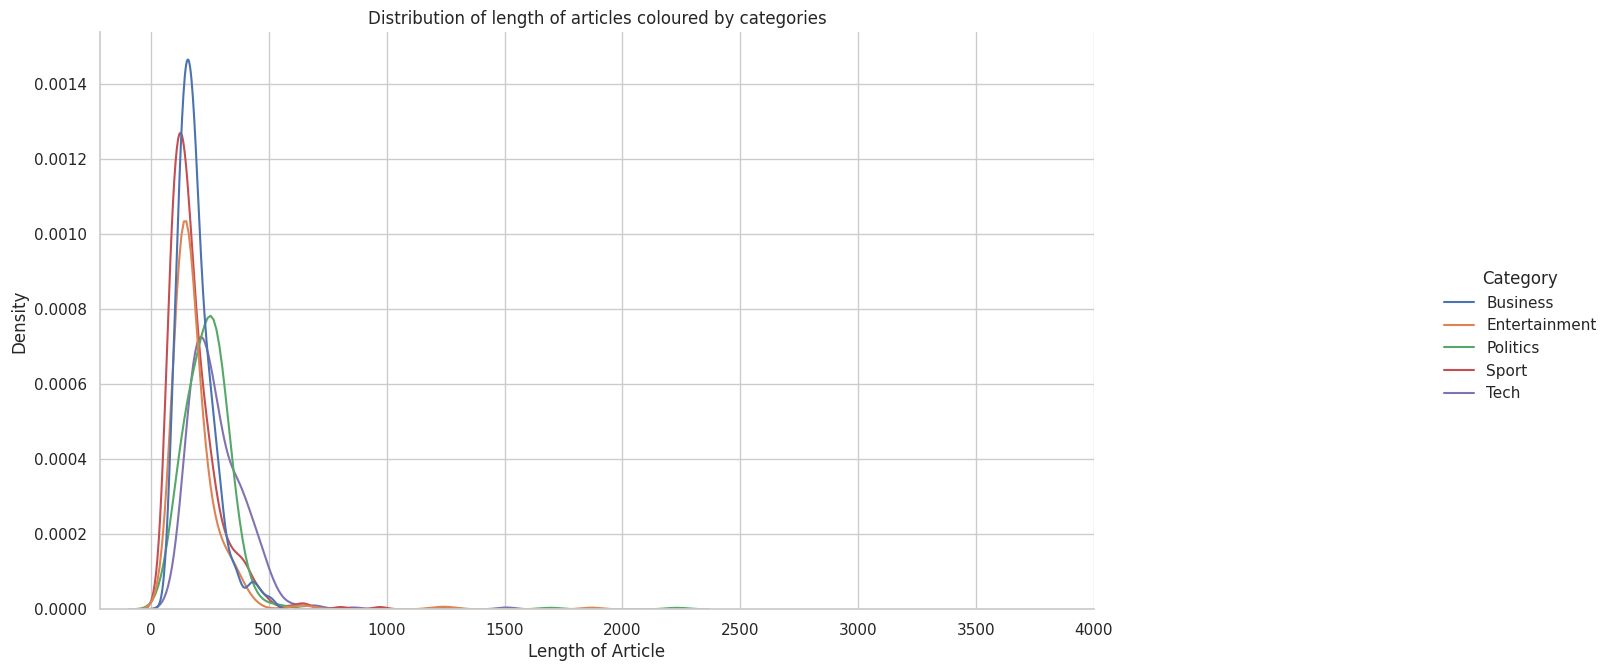

In [22]:
sns.set(style = 'whitegrid')
figu = sns.displot(x = data['Description'].str.split(' ').apply(len), hue = data['Category'], kind = 'kde')
figu.figure.set_size_inches(18,7)
figu.set(title = f'Distribution of length of articles coloured by categories', xlabel = 'Length of Article', xticks = range(0,4500,500))
plt.show()

##### 1. Why did you pick the specific chart?

*   This chart shows the distribution of article length for each category
*   A Density plot highlights how the article word count follows a specific distribution. Articles for all the categories are plot together to observe the differences in individual distributions

##### 2. What is/are the insight(s) found from the chart?

*   It can be observed that most articles are with word count of ~250
*   Articles from the politics category are usually longer in word count

##### 3. Will the gained insights help creating a positive business impact?

*   It can be observed that each category seems to follow a specific pattern for the number of words in each article. **This information could be used as a feature for predicting the Topic as part of a Supervised (Classification) Machine Learning problem**
*   For this particular problem, the dataset with only textual information is proceeded for pre-processing and analysis  

## **5. Feature Engineering & Data Pre-processing**

### 1. Textual Data Preprocessing

In [23]:
data.loc[1, 'Description']

'number peopl work europ largest economi risen tenth straight month growth remain stubborn slow german unemploy rose 7000 novemb 4464 million peopl 108 workforc season adjust rise show smaller rise expect govern measur encourag job creation began take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth 01 third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export also negat effect brunt unemploy still felt eastern part germani rate 188 unemploy stuck 4 million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work paid cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alr

*   It can be observed that the dataset contains several **punctuations** and **stopwords**. They shall be addressed in the following sections
*   Also, only the **data['Descriptions']** feature is made to undergo data pre-processing, since the Title is a subset of the article description

#### 1.1 Expanding Contractions

In [24]:
# Install and import contractions library
!pip install contractions

In [25]:
import contractions

In [26]:
# Function for expanding contracted words
def expand_contractions(text):
  '''Expands contractions in textual data'''
  expanded_words = []
  for word in text.split():
    expanded_words.append(contractions.fix(word))
  return ' '.join(expanded_words)

In [27]:
data['Description'] = data['Description'].apply(expand_contractions)

#### 1.2 Lower Casing

In [28]:
def make_lower(text):
  return text.lower()

In [29]:
data['Description'] = data['Description'].apply(make_lower)

#### 1.3 Removing Punctuations

In [30]:
# Removes all Punctuations
def remove_punc(text):
  return re.sub(r'\W',' ',text)

In [31]:
data['Description'] = data['Description'].apply(remove_punc)

In [32]:
data.loc[1, 'Description']

'number peopl work europ largest economi risen tenth straight month growth remain stubborn slow german unemploy rose 7000 novemb 4464 million peopl 108 workforc season adjust rise show smaller rise expect govern measur encourag job creation began take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth 01 third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export also negat effect brunt unemploy still felt eastern part germani rate 188 unemploy stuck 4 million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work paid cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alr

*   **Punctuations** have been removed from the dataset.

#### 1.4 Removing URLs, Digits and White Spaces

In [33]:
data['Description'].str.contains('http').sum()

0

*   No **URLs** are present in the Dataset.

In [34]:
# Functions for removing digits and whitespaces using re library
def remove_digits(text):
  return re.sub(r'\d',' ',text)

def remove_whitespace(text):
  return re.sub(r'\s+',' ',text)

In [35]:
data['Description'] = data['Description'].apply(remove_digits)
data['Description'] = data['Description'].apply(remove_whitespace)

In [36]:
data.loc[1, 'Description']

'number peopl work europ largest economi risen tenth straight month growth remain stubborn slow german unemploy rose novemb million peopl workforc season adjust rise show smaller rise expect govern measur encourag job creation began take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export also negat effect brunt unemploy still felt eastern part germani rate unemploy stuck million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work paid cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alreadi take place affect 

*   **Digits** and **whitespaces** removed from the dataset

#### 1.5 Removing Stopwords

In [37]:
# Remove Stopwords
def remove_stopwords(text, stop_words):
  '''Removes stopwords (given as input)  from text'''
  text = [word for word in text.split() if word.lower() not in stop_words]
  return ' '.join(text)

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
stop_words = stopwords.words('english')
data['Description'] = data['Description'].apply(remove_stopwords, stop_words = stop_words)

In [40]:
data.loc[1, 'Description']

'number peopl work europ largest economi risen tenth straight month growth remain stubborn slow german unemploy rose novemb million peopl workforc season adjust rise show smaller rise expect govern measur encourag job creation began take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export also negat effect brunt unemploy still felt eastern part germani rate unemploy stuck million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work paid cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alreadi take place affect 

*   **Stopwords** have been removed from the dataset. Now, let's see the top 10 words in the dataset

In [41]:
def top_n_words_features(count_vectorizer, text, n_words):
    '''
    Returns a tuple. First element being a dataframe containing the top n words
    in a sample and their counts, given a CountVectorizer object and text sample
    Second element is the total number of unique words/features tokenised
    '''
    vectorized = count_vectorizer.fit_transform(text)
    tokens_df = pd.DataFrame(vectorized.todense(), columns = count_vectorizer.get_feature_names_out())
    top_df = pd.DataFrame(tokens_df.sum().sort_values(ascending=False).head(n_words)).rename(columns = {0:'Occurences'})
    return top_df, len(count_vectorizer.get_feature_names_out())

In [42]:
vectorizer = CountVectorizer()
top_words, n_features_raw = top_n_words_features(vectorizer, data['Description'], 10)

<Axes: >

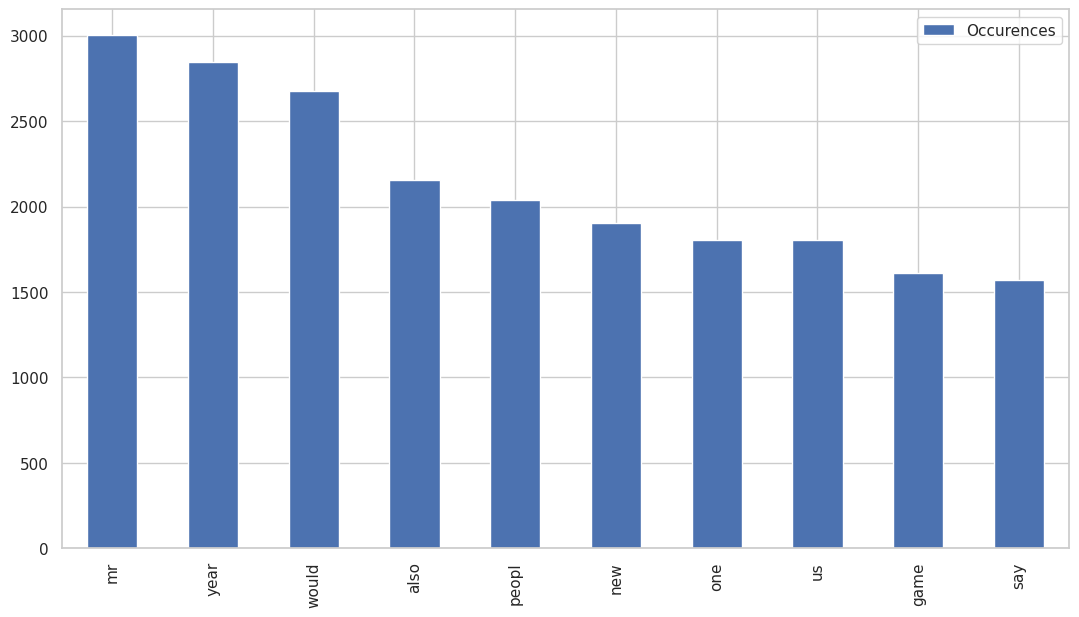

In [43]:
top_words.plot(kind='bar', figsize = (13,7))

In [44]:
n_features_raw

21286

*   It can be observed that there are 27573 unique words in the dataset. This is still a high number, and dimensionality reduction is required.

#### 1.6 Text Lemmatization

In [45]:
# Required downloads for Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [46]:
# Function for lemmatizing the verbs
def lemmatize_(text, lemmatizer):
  text = [lemmatizer.lemmatize(word, pos='v') for word in text.split()]
  return ' '.join(text)

In [47]:
lemmatiser =  WordNetLemmatizer()
data['Description'] = data['Description'].apply(lemmatize_, lemmatizer = lemmatiser)

In [48]:
top_words, n_features = top_n_words_features(vectorizer, data['Description'], 10)

<Axes: >

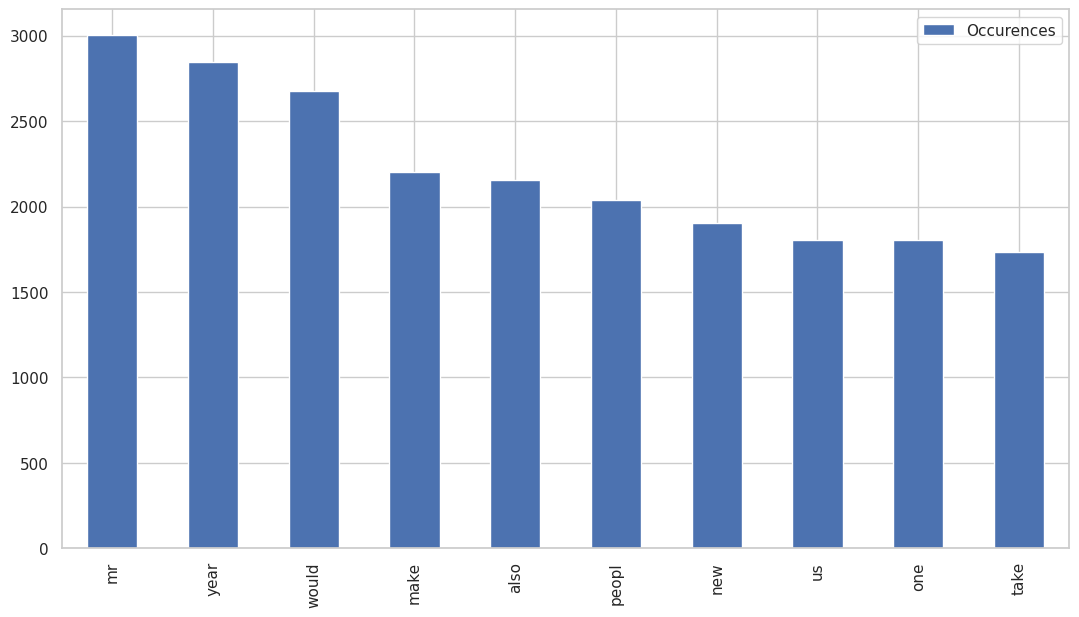

In [49]:
top_words.plot(kind='bar', figsize = (13,7))

In [50]:
n_features

21112

*   The number of unique features has been reduced to 22545
*   Here, **Text lemmetization** is chosen over stemming because the former is preferred for contextual analysis, i.e., the context in which word is used is important. Since this is crucial for Topic Modelling, Lemmatization is preferred

#### 1.7 Removing further Stopwords

*   It can be observed that, a few very frequent words like "say", "mr", "would", "also" etc do not contribute to decision of a Topic/category. Hence these words, on account of being too frequent, could be eliminated

In [51]:
stop_words.extend(['say', 'mr', 'would', 'also'])
data['Description'] = data['Description'].apply(remove_stopwords, stop_words = stop_words)

<Axes: >

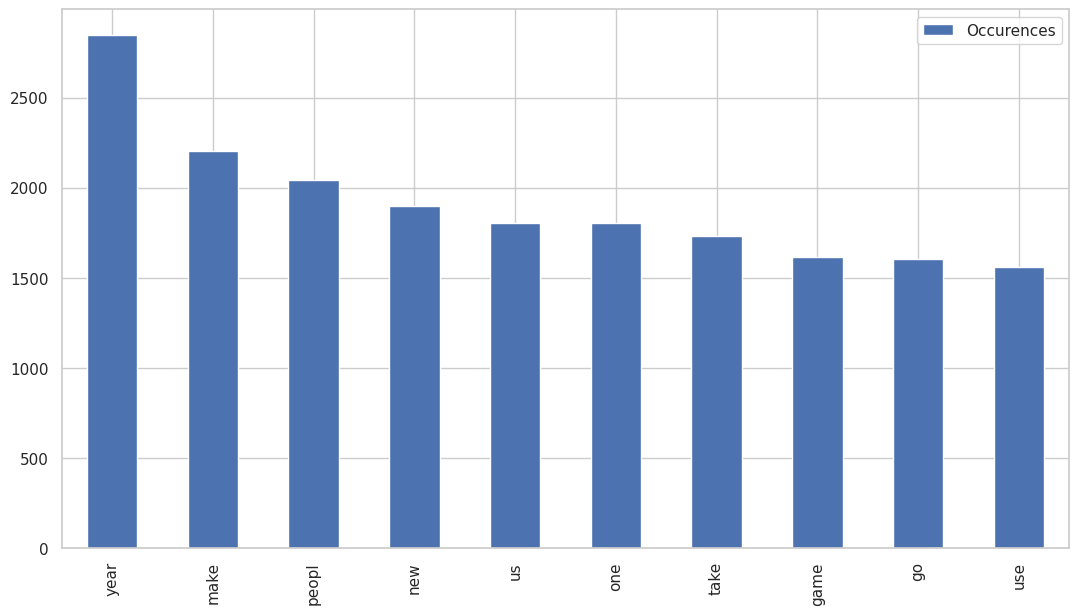

In [52]:
top_n_words_features(vectorizer, data['Description'], 10)[0].plot(kind='bar', figsize = (13,7))

#### 1.8 Text Vectorization

In [53]:
# Vectorizing Text
tokeniser = CountVectorizer(max_df = 0.95, min_df = 0.02)
tokenised_data = tokeniser.fit_transform(data['Description'])

In [54]:
top_words, n_features = top_n_words_features(tokeniser, data['Description'], 10)

<Axes: >

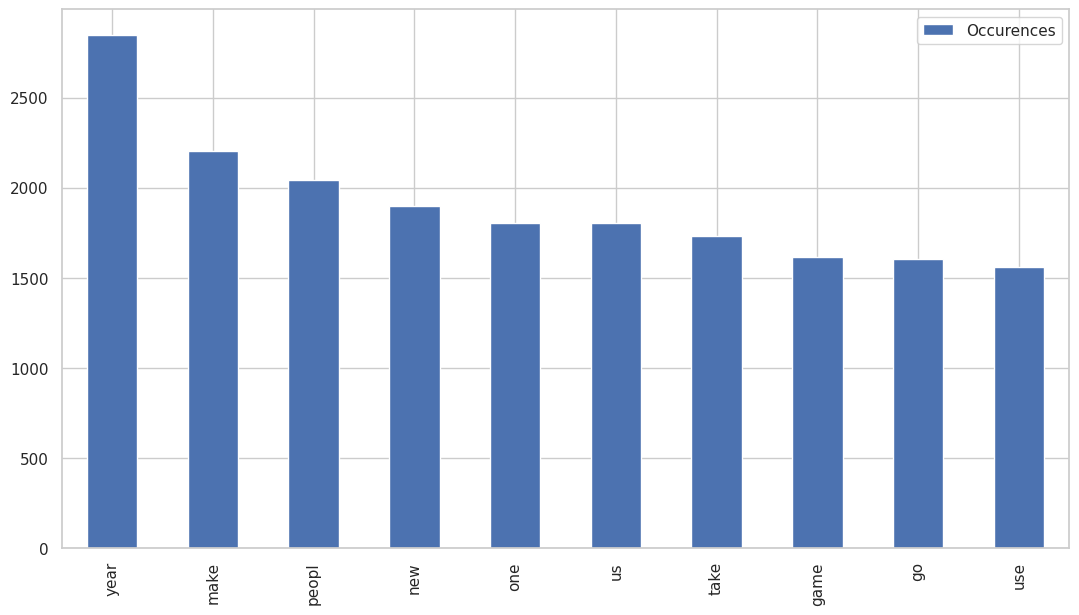

In [55]:
top_words.plot(kind = 'bar', figsize = (13,7))

In [56]:
print(f'Number of features after vectorization = {n_features}')
print(f'\nAfter Text Pre-processing, {round((n_features_raw - n_features)*100/n_features_raw, 2)}% of contextually insignificant features have been removed')

Number of features after vectorization = 1417

After Text Pre-processing, 93.34% of contextually insignificant features have been removed


*   It can be observed that the number of features has reduced by a great number due to the addition of the keyword arguments max_df and min_df. Now, the number of documents is greater in number than the number of features, we may proceed with model building

##### Which text vectorization technique have you used and why?

*   **Count Vectorization** is chosen for Vectorizing the text. This is because LDA as a word generating algorithm inherently deals with term counts to generate words from a multinomial distribution.
*   **NOTE**: **The above statement is considered as a Null Hypotheses statement.** To validate it, the Tfidf-Vectorizer was utilised for Text vectorization. Refer the next section for more details

## **6. ML Model Implementation**

### ML Model - 1 - **Latent Dirichlet Allocation**

#### 1. Model implementation

*   The business requirement here is 5 topics. Still, the Hyperparameter  **number of topics** is tuned to compute its optimum number by using GridSearchCV for number of topics greater than or equal to five
*   If the optimum number  topics is greater than five, appropriate topics can be combined to categorise the documents to five topics  

In [57]:
# Fitting an LDA model with Hyperparameter tuning on the tokenised_data
%%time
lda = LatentDirichletAllocation(random_state = 42)
grid_params = {'n_components' : list(range(5,10))}                 # Number of topics in range of [5,10)
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(tokenised_data)

CPU times: user 4min 10s, sys: 1.77 s, total: 4min 11s
Wall time: 4min 13s


GridSearchCV(estimator=LatentDirichletAllocation(random_state=42),
             param_grid={'n_components': [5, 6, 7, 8, 9]})

In [58]:
best_lda_model = lda_model.best_estimator_
log_likelihood_m1 = lda_model.best_score_
perplexity_m1 = best_lda_model.perplexity(tokenised_data)
print("Parameters of Best LDA Model" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model", log_likelihood_m1)
print("Perplixity Score on the LDA model", perplexity_m1)

Parameters of Best LDA Model {'n_components': 5}
Best log likelihood Score for the LDA model -477760.247472721
Perplixity Score on the LDA model 763.0653436674005


*   It can be observed that the **optimum number of topics is five**, which is the business requirement as well. So we proceed with this best LDA model

##### Which hyperparameter optimization technique have you used and why?

*   Algorithms like **GridSearch** and **RandomSearch** were introduced to automate the process of running the model on various desired combinations of components that the user wishes to optimise, instead of manually running through every combination which is not only time consuming, but also requires regular involvement of the user
*   **RandomSearch** is a method which tries out random combinations of the hyperparameter values to be tuned, unlike GridSearchCV which runs through all the possible combinations.
*   **In this case, GridSearchCV is sufficient** as the computational time is not very high (~5-10 minutes at the maximum), and there is only one hyperparameter which is being tuned.

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### 2.1 Visualisation

In [89]:
!pip install gensim pyLDAvis

import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models

# Prepare your corpus and dictionary
#texts = [doc.split() for doc in df]
texts = [str(doc).split() for doc in df['Description']]

id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

# Fit LDA
lda_gensim = LdaModel(corpus=corpus, id2word=id2word, num_topics=5,random_state=42)

# Visualize
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_gensim, corpus, id2word)
pyLDAvis.display(vis)


##### 2.2 Assigning the Topic labels to each document

In [90]:
from gensim import corpora, models

# Suppose this is your first document (already tokenized)
#tokenised_data = [doc.split() for doc in df]  # If not already tokenized
tokenised_data = [str(doc).split() for doc in data['Description']]

first_doc = tokenised_data[0]

# Build dictionary
id2word = corpora.Dictionary(tokenised_data)

# Convert to bag-of-words format (this defines bow_vector)
bow_vector = id2word.doc2bow(first_doc)

# Load or train your LDA model
best_lda_model = models.LdaModel(corpus=[id2word.doc2bow(text) for text in tokenised_data],
                                 id2word=id2word,
                                 num_topics=5,
                                 random_state=42)

# Get topic distribution for the first document
topic_distribution = best_lda_model[bow_vector]

print(topic_distribution)



[(4, 0.9939328)]


In [91]:
def assign_topics(data, tokenised, model, dictionary):
    '''
    Assigns topics for each document using Gensim LDA.
    Returns the input dataframe with an additional column 'Topic_LDA' indicating the dominant topic (1-indexed).

    Parameters:
    - data: Original DataFrame
    - tokenised: List of tokenized documents (list of list of str)
    - model: Trained Gensim LDA model
    - dictionary: Gensim Dictionary used to create the corpus
    '''
    topics = []

    for doc in tokenised:
        bow = dictionary.doc2bow(doc)
        topic_probs = model.get_document_topics(bow, minimum_probability=0.0)
        # topic_probs is a list of (topic_id, prob); we get the topic with max prob
        top_topic = max(topic_probs, key=lambda x: x[1])[0] + 1  # +1 to make it 1-indexed
        topics.append(top_topic)

    topics_df = pd.DataFrame(topics, columns=['Topic_LDA'])
    return pd.merge(data, topics_df, left_index=True, right_index=True)


In [ ]:
%whos

In [92]:
#result_df = assign_topics(data, tokenised_data, best_lda_model, id2word)
#result_df = assign_topics(data, tokenised_docs, lda_gensim, id2word)
result_df = assign_topics(data, tokenised_data, lda_gensim, id2word)



In [63]:
result_df.head(2)

Unnamed: 0                              Title  \
0           0   India calls for fair trade rules   
1           1  Sluggish economy hits German jobs   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Description  \
0                                           india attend g meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g nation object subsidi agricultur make hard develop nation like india compet call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order give india china integr global economi issu globalis term engag globalis chidambaram attend g meet part g group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock tell confer india along china brazil south africa russia invit take part g meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g nation particular us blame surg cheap chin export countri tri use fix exchang rate wish make judgement chidambaram separ imf warn thursday india budget deficit larg hamper countri econom growth forecast around year march year march indian economi grow   
1  number peopl work europ largest economi rise tenth straight month growth remain stubborn slow german unemploy rise novemb million peopl workforc season adjust rise show smaller rise expect govern measur encourag job creation begin take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export negat effect brunt unemploy still felt eastern part germani rate unemploy stick million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work pay cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alreadi take place affect unemploy statist economist deterior labour market come surpris isabell kronawitt hypovereinsbank job creation measur probabl prevent stronger increas season adjust number   

   Category  Topic_LDA  
0  Business          4  
1  Business          3

##### 2.3 Comparison of Topics obtained through LDA with input Categories

In [93]:
result_df.groupby(['Category', 'Topic_LDA'])['Title'].count()

Category       Topic_LDA
Business       1            142
               3            356
               4             12
Entertainment  1            199
               2              2
               3            184
               5              1
Politics       1            115
               2              2
               3            289
               4              9
               5              2
Sport          1            316
               2              1
               3            188
               4              6
Tech           1            197
               2              1
               3            203
Name: Title, dtype: int64

*   It can be observed above that for each of the Categories, the implemented LDA model predicted with high precision
*   For example, for articles originally tagged '**Business**', the LDA model has predicted **430 of 503 correctly**, labeled as **2**
*   This result is used to map the input Topics and LDA topics one-to-one. In the above case, 2 as Business and so on

In [94]:
def convert_labels(result):
    '''Converts numeric topic labels (Topic_LDA) to Category names based on majority voting.

    For each actual Category, it finds the most frequent Topic_LDA assigned,
    then maps that topic number back to the Category name.
    '''

    # Count how many times each topic was assigned within each category
    topic_counts = result.groupby(['Category', 'Topic_LDA'])['Title'].count().reset_index()

    # For each Category, find the Topic_LDA with the highest count
    dominant_topics = topic_counts.loc[topic_counts.groupby('Category')['Title'].idxmax()]

    # Create mapping: Topic_LDA → Category
    to_map_dict = dict(zip(dominant_topics['Topic_LDA'], dominant_topics['Category']))

    # Replace numeric topic labels with category names
    result['Topic_LDA'] = result['Topic_LDA'].map(to_map_dict)

    # Display mapping
    for topic, category in to_map_dict.items():
        print(f"Topic {topic} is mapped to category: '{category}'")

    return result


In [95]:
result_df = convert_labels(result_df)

Topic 3 is mapped to category: 'Tech'
Topic 1 is mapped to category: 'Sport'


In [96]:
result_df.head(2)

Unnamed: 0                              Title  \
0           0   India calls for fair trade rules   
1           1  Sluggish economy hits German jobs   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Description  \
0                                           india attend g meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g nation object subsidi agricultur make hard develop nation like india compet call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order give india china integr global economi issu globalis term engag globalis chidambaram attend g meet part g group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock tell confer india along china brazil south africa russia invit take part g meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g nation particular us blame surg cheap chin export countri tri use fix exchang rate wish make judgement chidambaram separ imf warn thursday india budget deficit larg hamper countri econom growth forecast around year march year march indian economi grow   
1  number peopl work europ largest economi rise tenth straight month growth remain stubborn slow german unemploy rise novemb million peopl workforc season adjust rise show smaller rise expect govern measur encourag job creation begin take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export negat effect brunt unemploy still felt eastern part germani rate unemploy stick million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work pay cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alreadi take place affect unemploy statist economist deterior labour market come surpris isabell kronawitt hypovereinsbank job creation measur probabl prevent stronger increas season adjust number   

   Category Topic_LDA  
0  Business      Tech  
1  Business      Tech

##### 2.4 Computing the Model Accuracy and individual Topic Precisions, Recalls, and F1 Scores

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------
# Plot Category Distribution
# ----------------------------------
def aggregate_plot(result_df):
    '''Plots the number of articles categorized by LDA vs original categories.'''
    aggregated_input = result_df['Category'].value_counts().rename("Original").to_frame()
    aggregated_LDA = result_df['Topic_LDA'].value_counts().rename("LDA").to_frame()
    aggregated = pd.merge(aggregated_input, aggregated_LDA, left_index=True, right_index=True)
    aggregated.plot(kind='bar', figsize=(13, 7))
    plt.ylabel("Number of Articles")
    plt.title("Comparison: Original vs. LDA-Predicted Categories")
    plt.show()

# ----------------------------------
# Model Accuracy
# ----------------------------------
def model_accuracy(result):
    '''Returns the percentage of correctly categorized articles (after topic-to-category mapping).'''
    correct = result[result['Category'] == result['Topic_LDA']].shape[0]
    total = result.shape[0]
    return (correct / total) * 100

# ----------------------------------
# Topic Precision (TP / (TP + FP))
# ----------------------------------
def topic_precision(df):
    '''Precision per predicted topic (how pure each topic is).'''
    total_pred = df.groupby('Topic_LDA')['Count'].sum().reset_index(name='Total')
    correct_pred = df[df['Category'] == df['Topic_LDA']].groupby('Topic_LDA')['Count'].sum().reset_index(name='Correct')

    merged = pd.merge(total_pred, correct_pred, how='left', on='Topic_LDA').fillna(0)
    merged['Precision'] = (merged['Correct'] / merged['Total']) * 100
    return merged[['Topic_LDA', 'Precision']].rename(columns={'Topic_LDA': 'Topic'})

# ----------------------------------
# Topic Recall (TP / (TP + FN))
# ----------------------------------
def topic_recall(df):
    '''Recall per actual category (how well we recovered each true category).'''
    total_actual = df.groupby('Category')['Count'].sum().reset_index(name='Total')
    correct_pred = df[df['Category'] == df['Topic_LDA']].groupby('Category')['Count'].sum().reset_index(name='Correct')

    merged = pd.merge(total_actual, correct_pred, how='left', on='Category').fillna(0)
    merged['Recall'] = (merged['Correct'] / merged['Total']) * 100
    return merged[['Category', 'Recall']].rename(columns={'Category': 'Topic'})

# ----------------------------------
# Precision, Recall, F1 per Category
# ----------------------------------
def precision_recall_f1(result):
    '''Returns precision, recall, and F1 score per category.'''
    df = result.groupby(['Category', 'Topic_LDA'], as_index=False)['Title'].count().rename(columns={'Title': 'Count'})

    precisions = topic_precision(df)
    recalls = topic_recall(df)

    prf = pd.merge(recalls, precisions, on='Topic')
    prf['F1_Score'] = (2 * prf['Precision'] * prf['Recall']) / (prf['Precision'] + prf['Recall'])
    return prf


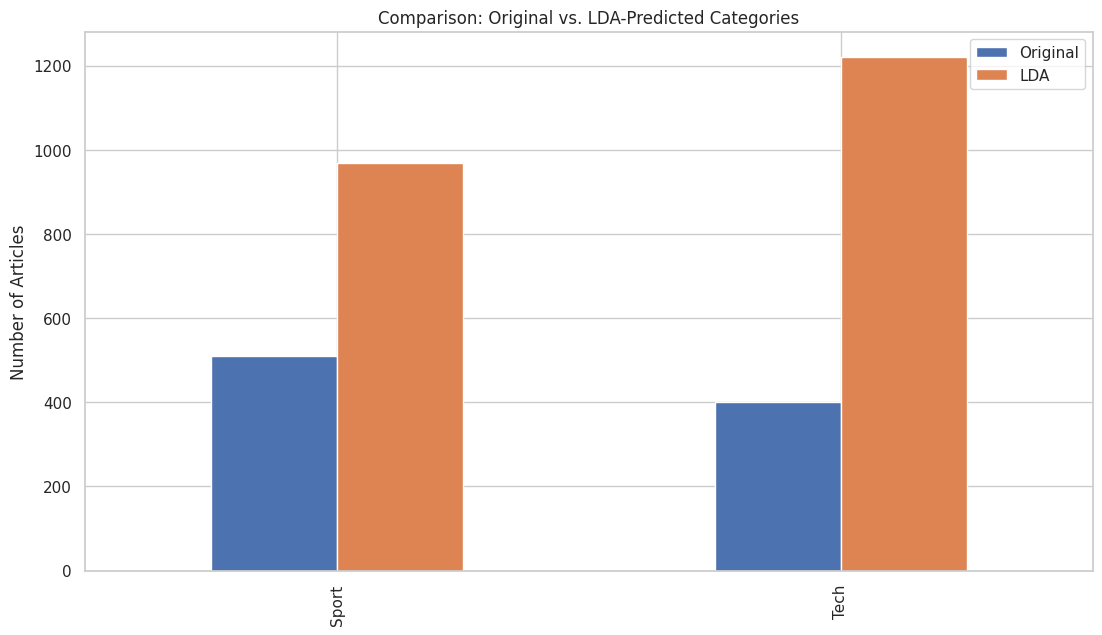

In [98]:
aggregate_plot(result_df)

In [99]:
print(f'The LDA model has an accuracy of {round(model_accuracy(result_df),2)}%')

The LDA model has an accuracy of 23.33%


In [100]:
prf1_m1 = precision_recall_f1(result_df)
prf1_m1

Topic     Recall  Precision   F1_Score
0  Sport  62.698413  32.610939  42.905635
1   Tech  50.750000  16.639344  25.061728

*   It can be observed that the LDA model has a good accuracy and excellent F1 scores in Topic modeling for most of the Categories.

##### 2.5 Topic-wise analysis - Term distributions for each Topic

In [101]:
def top_n_terms(vectorizer, model, n_top_words):
  '''Takes the vectorizer, model and the required number of most frequent words
  as input and returns a list of length (number of topics), each element being a
  dictionary of the word and its frequency of occurence in the particular topic'''

  # List of all words vectorized
  words = vectorizer.get_feature_names_out()

  # List of 5 dictionaries
  top_words_topic = []
  for topic, weights in enumerate(model.components_):
    word_weights = dict()

    # Indices of top n words
    indices = np.argsort(weights)[::-1][:n_top_words]

    # Top n words and their weights
    top_words = words[indices]
    top_weights = weights[indices]

    for i in range(len(words[indices])):
      word_weights[top_words[i]] = top_weights[i]
    top_words_topic.append(word_weights)
  return top_words_topic

def plot_wordcloud(topic_term_freq):
  '''Plots a word cloud, sizing proportional to frequency of the word in the topic'''

  colours = ['black', 'darkslateblue', 'darkolivegreen', 'khaki']
  wordcloud = WordCloud(width = 1300, height = 800,
                  background_color = random.choice(colours),
                  min_font_size = 10).generate(' '.join(list(topic_term_freq.keys())))
  wordcloud = wordcloud.generate_from_frequencies(frequencies = topic_term_freq)
  plt.figure(figsize = (13,8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.show()

In [ ]:
%whos


In [102]:
top_words = []
for topic_id in range(lda_gensim.num_topics):
    top_terms = lda_gensim.show_topic(topic_id, topn=100)
    term_dict={word:prob for word, prob in top_terms}
    top_words.append(term_dict)

print(top_words[0])


{'game': 0.009805496, 'new': 0.005767328, 'mr': 0.005697813, 'would': 0.005181904, 'year': 0.0050017764, 'use': 0.004932715, 'peopl': 0.004564096, 'like': 0.0037066622, 'could': 0.0036689276, 'also': 0.0035818676, 'world': 0.0035597568, 'work': 0.0033864647, 'get': 0.0033755952, 'domain': 0.003369507, 'play': 0.003313029, 'two': 0.0030376723, 'make': 0.0030331668, 'number': 0.0030254042, 'player': 0.003018059, 'one': 0.003005548, 'nintendo': 0.0029979825, 'time': 0.00297989, 'first': 0.0026454583, 'part': 0.0026156062, 'look': 0.0025087323, 'take': 0.002466794, 'next': 0.0024144235, 'develop': 0.002386671, 'name': 0.002380335, 'last': 0.0023502756, 'way': 0.0022963611, 'say': 0.002268785, 'machin': 0.0022212528, 'open': 0.0022155272, 'set': 0.00221011, 'technolog': 0.0021887077, 'back': 0.0021338586, 'need': 0.0020797735, 'consol': 0.002036693, 'million': 0.0020148687, 'us': 0.001988456, 'gamer': 0.0019844237, 'compani': 0.0019548526, 'titl': 0.0019212551, 'net': 0.0019010266, 'market'

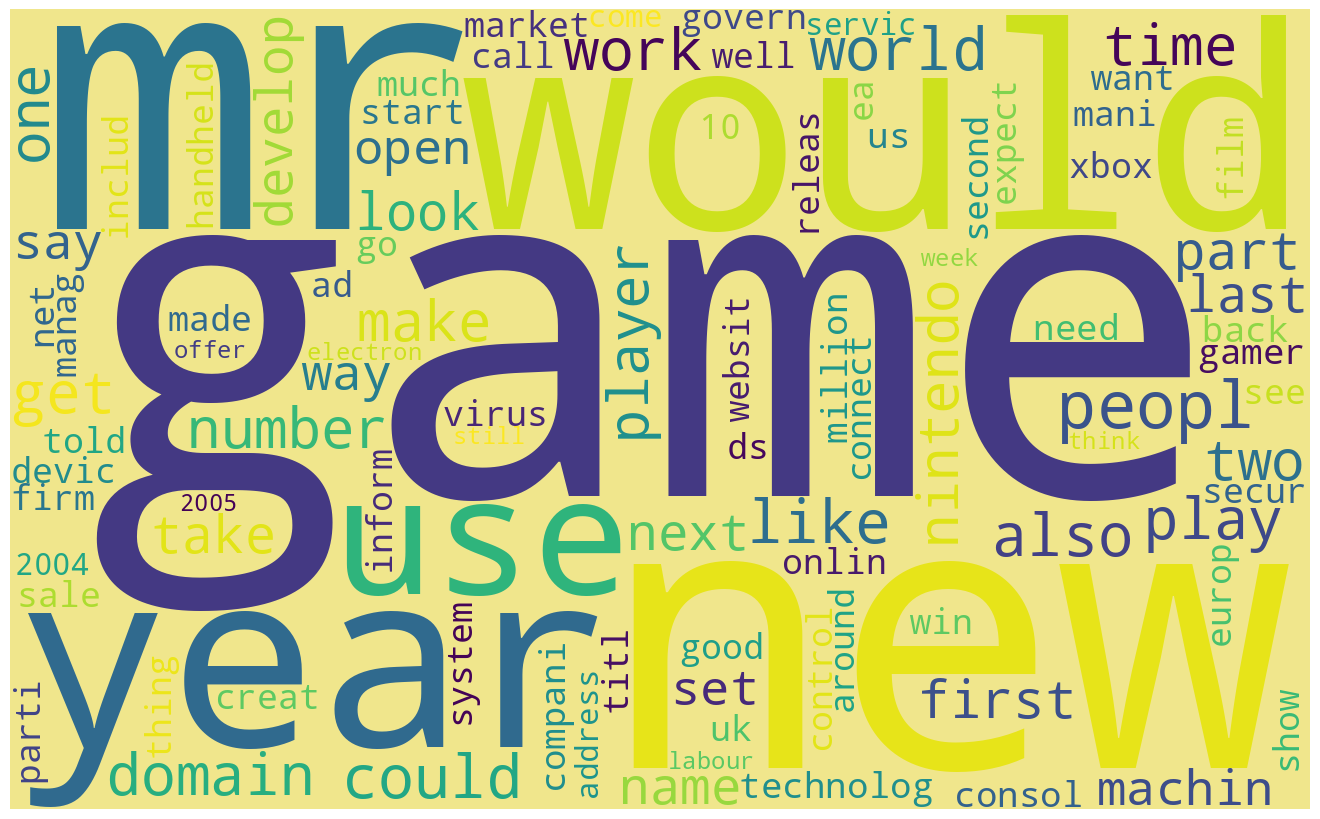

In [103]:
plot_wordcloud(top_words[0])

*   Looking at the word distributions, it can be concluded that this is the **Entertainment** Topic

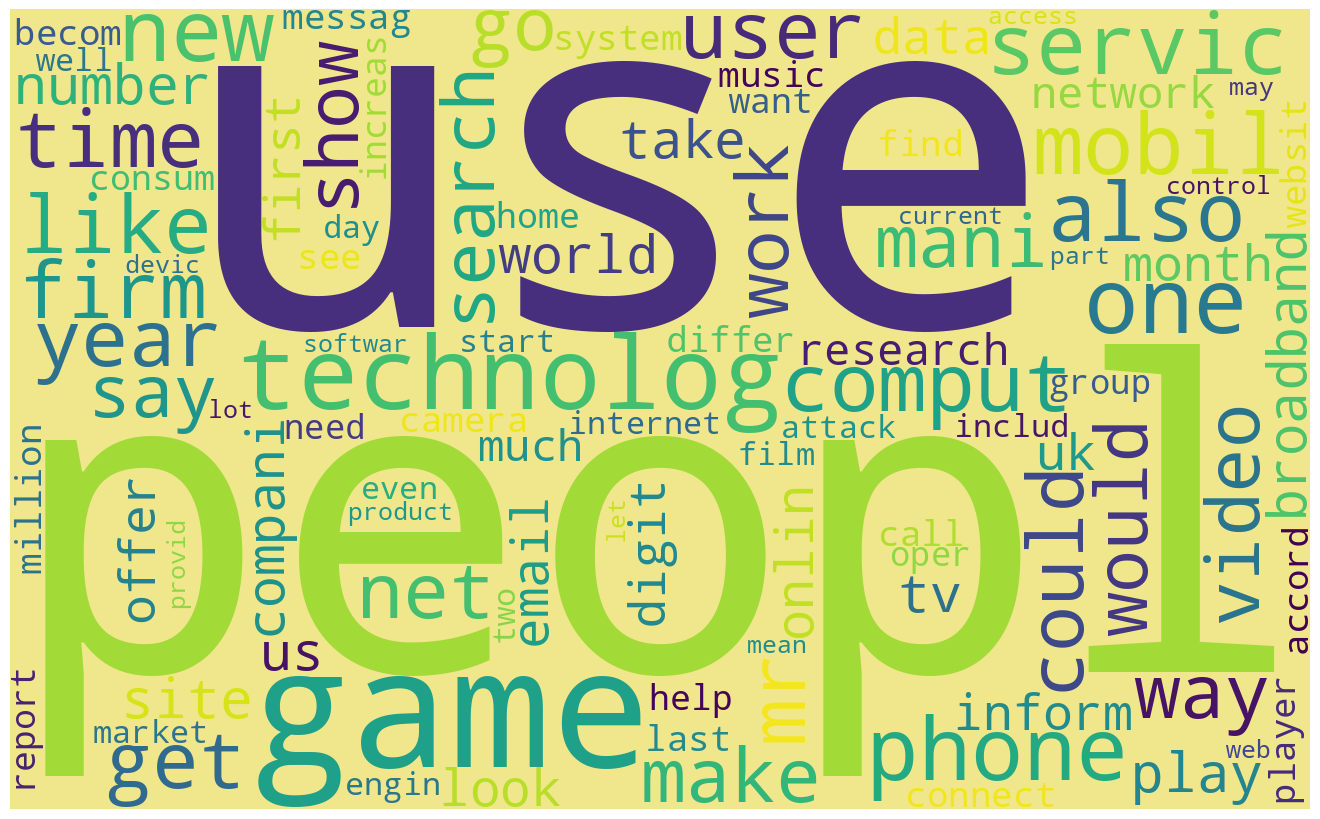

In [104]:
plot_wordcloud(top_words[1])

*   Looking at the word distributions, it can be concluded that this is the **Business** Topic

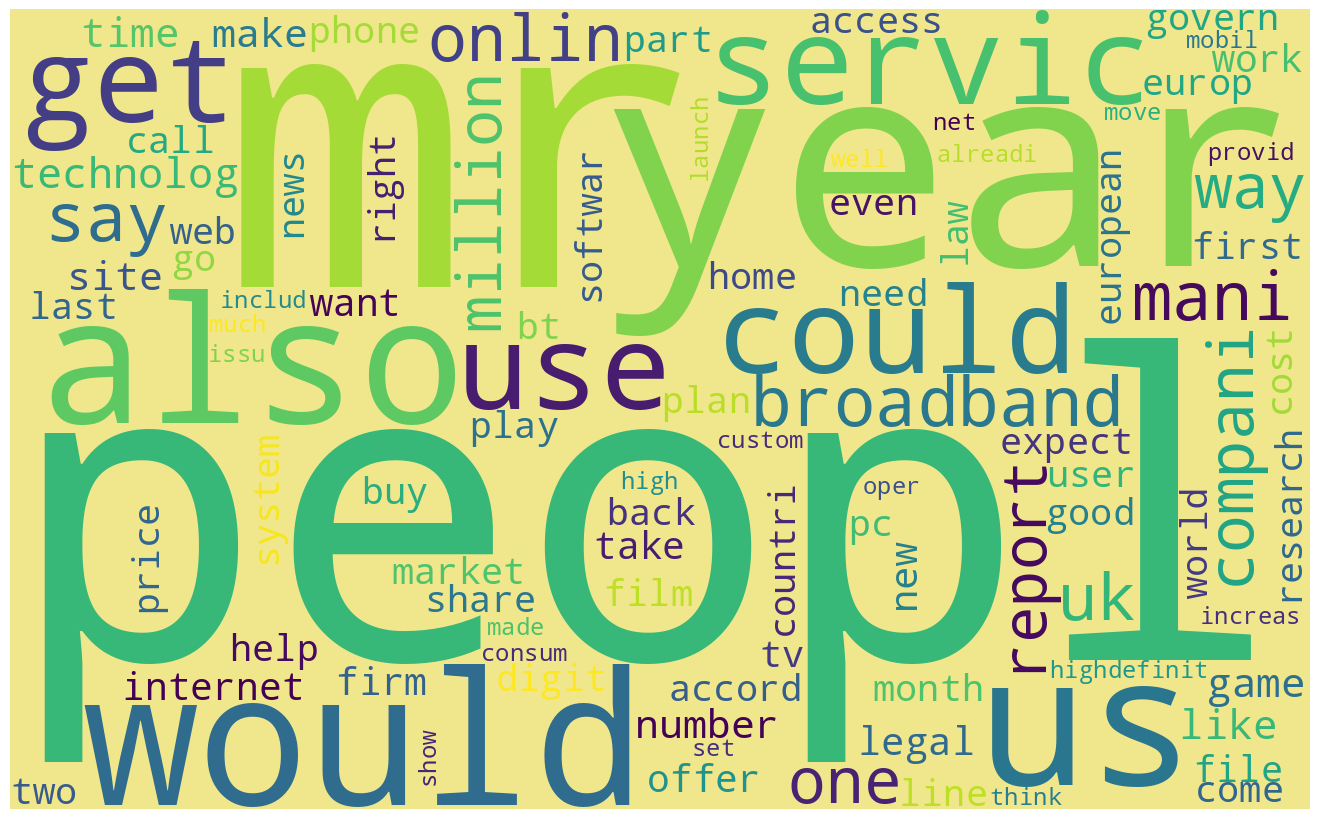

In [105]:
plot_wordcloud(top_words[2])

*   Looking at the word distributions, it can be concluded that this is the **Tech** Topic

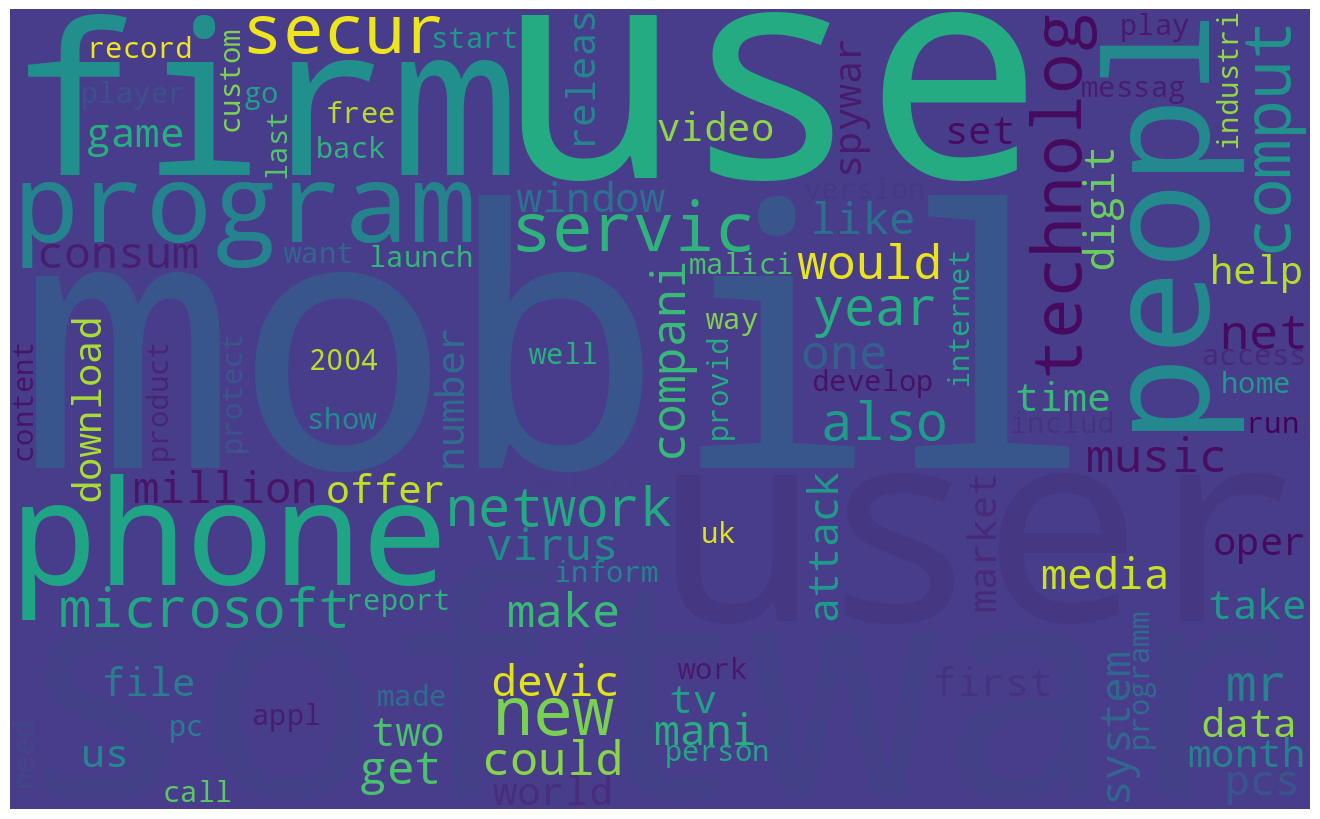

In [106]:
plot_wordcloud(top_words[3])

*   Looking at the word distributions, it can be concluded that this is the **Politics** Topic

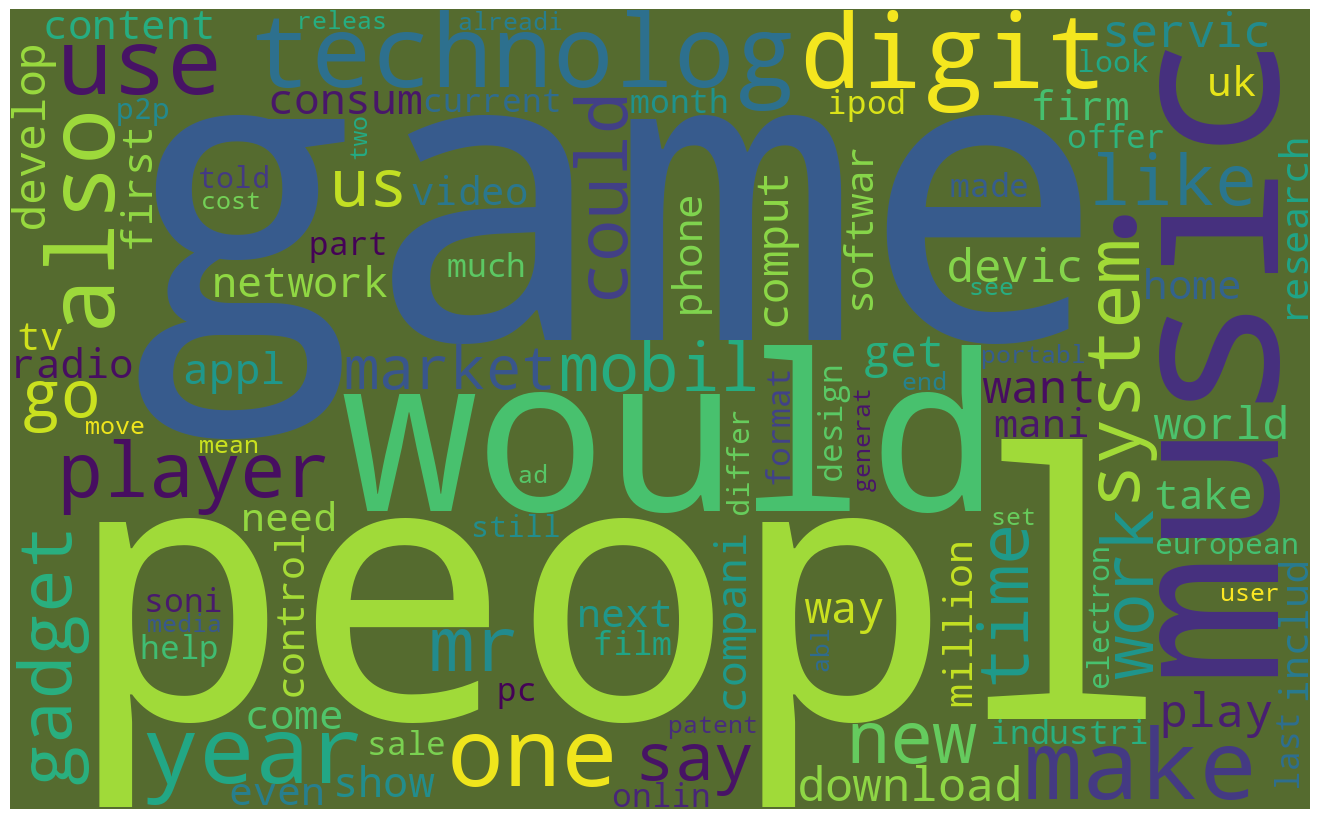

In [107]:
plot_wordcloud(top_words[4])

*   Looking at the word distributions, it can be concluded that this is the **Sport** Topic

### ML Model - 2 - **Latent Dirichlet Allocation with TFIDF Vectorizer**

#### 1. Model implementation

As the second model, the LDA Algorithm is used with TFIDF-Vectorizer as vectorization method on the dataset

In [108]:
%%time
# Vectorizing using the TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 0.02)
tfidf_vectorized = tfidf_vectorizer.fit_transform(data['Description'])

print(f'The number of features/tokens after TFIDF Vectorizer is {len(tfidf_vectorizer.get_feature_names_out())}\n')

# Fitting the LDA model on the TFIDF-vectorized data
lda = LatentDirichletAllocation(random_state = 15)
grid_params = {'n_components' : list(range(5,10))}
lda_model_2 = GridSearchCV(lda, param_grid = grid_params)
lda_model_2.fit(tfidf_vectorized)

The number of features/tokens after TFIDF Vectorizer is 1417

CPU times: user 1min 44s, sys: 521 ms, total: 1min 45s
Wall time: 1min 46s


GridSearchCV(estimator=LatentDirichletAllocation(random_state=15),
             param_grid={'n_components': [5, 6, 7, 8, 9]})

In [109]:
# Printing the characteristics of the best model by TFIDF vectorization
best_lda_model_tfidf = lda_model_2.best_estimator_
log_likelihood_m2 = lda_model_2.best_score_
perplexity_m2 = best_lda_model_tfidf.perplexity(tfidf_vectorized)
print("Parameters of Best LDA Model" , lda_model_2.best_params_)
print("Best log likelihood Score for the LDA model", log_likelihood_m2)
print("Perplexity of LDA model with TfidfVectorizer on data", perplexity_m2)

Parameters of Best LDA Model {'n_components': 5}
Best log likelihood Score for the LDA model -32242.967206296707
Perplexity of LDA model with TfidfVectorizer on data 2065.2156197910394


#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### 2.1 Visualisation

In [110]:
!pip install pyLDAvis

In [111]:
# Visualising the Topics
try:
  lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, tokenised_data, tokeniser, mds='tsne')
  lda_panel
except AttributeError:
  pass

##### 2.2 Assigning the Topic names to each document

*   Like in the previous model, each topic article is assigned to a topic label based on the probabilities of each topic for each document

In [112]:
# Assigning dominant topic to each document in corpus
def assign_gensim_topics(data, corpus, lda_model):
    '''Assigns the most probable topic to each document'''
    topic_assignments = []
    for doc_bow in corpus:
        topic_probs = lda_model.get_document_topics(doc_bow)
        if topic_probs:
            dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
        else:
            dominant_topic = None
        topic_assignments.append(dominant_topic)

    # Add topic to DataFrame
    data = data.copy()
    data['Topic_LDA'] = topic_assignments
    return data

# Apply to your corpus and model
result_df = assign_gensim_topics(data, corpus, best_lda_model)
result_df.head(2)


IndexError: index 21121 is out of bounds for axis 1 with size 21121

In [113]:
# Tokenization (must match LDA training input)
tokenised_data = [str(doc).split() for doc in data['Description']]

# Dictionary and corpus (used consistently everywhere)
id2word = corpora.Dictionary(tokenised_data)
corpus = [id2word.doc2bow(text) for text in tokenised_data]

# Train LDA model (optional: reuse if already trained)
best_lda_model = models.LdaModel(corpus=corpus,
                                 id2word=id2word,
                                 num_topics=5,
                                 random_state=42)

# Topic assignment function (same as you wrote)
def assign_gensim_topics(data, corpus, lda_model):
    topic_assignments = []
    for doc_bow in corpus:
        topic_probs = lda_model.get_document_topics(doc_bow)
        if topic_probs:
            dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
        else:
            dominant_topic = None
        topic_assignments.append(dominant_topic)

    data = data.copy()
    data['Topic_LDA'] = topic_assignments
    return data

# Apply safely
result_df = assign_gensim_topics(data, corpus, best_lda_model)
result_df.head(2)


Unnamed: 0                              Title  \
0           0   India calls for fair trade rules   
1           1  Sluggish economy hits German jobs   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Description  \
0                                           india attend g meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g nation object subsidi agricultur make hard develop nation like india compet call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order give india china integr global economi issu globalis term engag globalis chidambaram attend g meet part g group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock tell confer india along china brazil south africa russia invit take part g meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g nation particular us blame surg cheap chin export countri tri use fix exchang rate wish make judgement chidambaram separ imf warn thursday india budget deficit larg hamper countri econom growth forecast around year march year march indian economi grow   
1  number peopl work europ largest economi rise tenth straight month growth remain stubborn slow german unemploy rise novemb million peopl workforc season adjust rise show smaller rise expect govern measur encourag job creation begin take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export negat effect brunt unemploy still felt eastern part germani rate unemploy stick million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work pay cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alreadi take place affect unemploy statist economist deterior labour market come surpris isabell kronawitt hypovereinsbank job creation measur probabl prevent stronger increas season adjust number   

   Category  Topic_LDA  
0  Business          4  
1  Business          4

In [114]:
from gensim import corpora

# Tokenized data should be a list of token lists with length 2225
tokenised_data = [...]  # Make sure this has 2225 entries

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(tokenised_data)
corpus = [dictionary.doc2bow(text) for text in tokenised_data]


TypeError: 'ellipsis' object is not iterable

In [115]:
print(type(tokenised_data))
print(len(tokenised_data))
print(tokenised_data[0])


<class 'list'>
1
Ellipsis


In [116]:
from gensim import corpora
# Filter out any entry that is not a list of strings
tokenised_data = [doc for doc in tokenised_data if isinstance(doc, list) and all(isinstance(w, str) for w in doc)]

# Step 1: Create dictionary
dictionary = corpora.Dictionary(tokenised_data)

# Step 2: Create corpus
corpus = [dictionary.doc2bow(text) for text in tokenised_data]


In [117]:
def assign_gensim_topics(data, corpus, lda_model):
    '''Assigns the most probable topic to each document'''

    if len(corpus) != len(data):
        raise ValueError(f"Mismatch: corpus has {len(corpus)} items, data has {len(data)} rows")

    topic_assignments = []
    for doc_bow in corpus:
        topic_probs = lda_model.get_document_topics(doc_bow)
        if topic_probs:
            dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
        else:
            dominant_topic = None
        topic_assignments.append(dominant_topic)

    data = data.copy()
    data['Topic_LDA'] = topic_assignments
    return data


In [119]:
# Drop NaNs from Description column
data = data.dropna(subset=['Description'])

# Tokenize descriptions into lists of words
tokenised_data = [str(doc).split() for doc in data['Description']]

# Filter out any garbage entries
tokenised_data = [doc for doc in tokenised_data if isinstance(doc, list) and all(isinstance(w, str) for w in doc)]

print(f"Tokenised documents: {len(tokenised_data)}")


Tokenised documents: 2225


In [120]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenised_data)
corpus = [dictionary.doc2bow(text) for text in tokenised_data]

print(f"Corpus size: {len(corpus)}")
print(f"Dictionary size: {len(dictionary)}")


Corpus size: 2225
Dictionary size: 21121


In [121]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)


In [122]:
def assign_gensim_topics(data, corpus, lda_model):
    '''Assigns the most probable topic to each document'''

    if len(corpus) != len(data):
        raise ValueError(f"Mismatch: corpus has {len(corpus)} items, data has {len(data)} rows")

    topic_assignments = []
    for doc_bow in corpus:
        topic_probs = lda_model.get_document_topics(doc_bow)
        if topic_probs:
            dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
        else:
            dominant_topic = None
        topic_assignments.append(dominant_topic)

    data = data.copy()
    data['Topic_LDA'] = topic_assignments
    return data

# Apply
result_df = assign_gensim_topics(data, corpus, lda_model)
result_df.head()


Unnamed: 0                              Title  \
0           0   India calls for fair trade rules   
1           1  Sluggish economy hits German jobs   
2           2   Indonesians face fuel price rise   
3           3  Court rejects $280bn tobacco case   
4           4   Dollar gains on Greenspan speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Description  \
0                                                                                                                                                                                                                                                                   india attend g meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g nation object subsidi agricultur make hard develop nation like india compet call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order give india china integr global economi issu globalis term engag globalis chidambaram attend g meet part g group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock tell confer india along china brazil south africa russia invit take part g meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g nation particular us blame surg cheap chin export countri tri use fix exchang rate wish make judgement chidambaram separ imf warn thursday india budget deficit larg hamper countri econom growth forecast around year march year march indian economi grow   
1                                                                                                                                                                                                                          number peopl work europ largest economi rise tenth straight month growth remain stubborn slow german unemploy rise novemb million peopl workforc season adjust rise show smaller rise expect govern measur encourag job creation begin take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export negat effect brunt unemploy still felt eastern part germani rate unemploy stick million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work 

In [123]:
print(type(tokenised_data))
print(len(tokenised_data))
print(tokenised_data[0])


<class 'list'>
2225
['india', 'attend', 'g', 'meet', 'seven', 'lead', 'industrialis', 'nation', 'friday', 'unlik', 'cow', 'newcom', 'status', 'london', 'thursday', 'ahead', 'meet', 'india', 'financ', 'minist', 'lash', 'restrict', 'trade', 'polici', 'g', 'nation', 'object', 'subsidi', 'agricultur', 'make', 'hard', 'develop', 'nation', 'like', 'india', 'compet', 'call', 'reform', 'unit', 'nation', 'world', 'bank', 'imf', 'palaniappan', 'chidambaram', 'india', 'financ', 'minist', 'argu', 'organis', 'need', 'take', 'account', 'chang', 'world', 'order', 'give', 'india', 'china', 'integr', 'global', 'economi', 'issu', 'globalis', 'term', 'engag', 'globalis', 'chidambaram', 'attend', 'g', 'meet', 'part', 'g', 'group', 'nation', 'account', 'two', 'third', 'world', 'popul', 'confer', 'develop', 'enterpris', 'host', 'uk', 'financ', 'minist', 'gordon', 'brown', 'friday', 'favour', 'float', 'exchang', 'rate', 'help', 'countri', 'cope', 'econom', 'shock', 'flexibl', 'exchang', 'rate', 'one', 'chann

In [124]:
import re

# Basic tokenization example
tokenised_data = [
    re.findall(r'\b\w+\b', str(text).lower())
    for text in data['Title']
]


In [125]:
from gensim import corpora

# Create dictionary and corpus
dictionary = corpora.Dictionary(tokenised_data)
corpus = [dictionary.doc2bow(text) for text in tokenised_data]

print(len(corpus))  # Should be 2225
print(corpus[:2])   # Check preview


2225
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]]


In [126]:
result_df = assign_gensim_topics(data, corpus, best_lda_model)
result_df.head(2)


Unnamed: 0                              Title  \
0           0   India calls for fair trade rules   
1           1  Sluggish economy hits German jobs   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Description  \
0                                           india attend g meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g nation object subsidi agricultur make hard develop nation like india compet call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order give india china integr global economi issu globalis term engag globalis chidambaram attend g meet part g group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock tell confer india along china brazil south africa russia invit take part g meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g nation particular us blame surg cheap chin export countri tri use fix exchang rate wish make judgement chidambaram separ imf warn thursday india budget deficit larg hamper countri econom growth forecast around year march year march indian economi grow   
1  number peopl work europ largest economi rise tenth straight month growth remain stubborn slow german unemploy rise novemb million peopl workforc season adjust rise show smaller rise expect govern measur encourag job creation begin take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export negat effect brunt unemploy still felt eastern part germani rate unemploy stick million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work pay cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alreadi take place affect unemploy statist economist deterior labour market come surpris isabell kronawitt hypovereinsbank job creation measur probabl prevent stronger increas season adjust number   

   Category  Topic_LDA  
0  Business          4  
1  Business          4

In [127]:
# Should match the one used during training
dictionary = best_lda_model.id2word


In [128]:
corpus = [dictionary.doc2bow(text) for text in tokenised_data]


In [129]:
result_df = assign_gensim_topics(data, corpus, best_lda_model)
result_df.head(2)


Unnamed: 0                              Title  \
0           0   India calls for fair trade rules   
1           1  Sluggish economy hits German jobs   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Description  \
0                                           india attend g meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g nation object subsidi agricultur make hard develop nation like india compet call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order give india china integr global economi issu globalis term engag globalis chidambaram attend g meet part g group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock tell confer india along china brazil south africa russia invit take part g meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g nation particular us blame surg cheap chin export countri tri use fix exchang rate wish make judgement chidambaram separ imf warn thursday india budget deficit larg hamper countri econom growth forecast around year march year march indian economi grow   
1  number peopl work europ largest economi rise tenth straight month growth remain stubborn slow german unemploy rise novemb million peopl workforc season adjust rise show smaller rise expect govern measur encourag job creation begin take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export negat effect brunt unemploy still felt eastern part germani rate unemploy stick million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work pay cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alreadi take place affect unemploy statist economist deterior labour market come surpris isabell kronawitt hypovereinsbank job creation measur probabl prevent stronger increas season adjust number   

   Category  Topic_LDA  
0  Business          4  
1  Business          4

In [130]:
def assign_gensim_topics(data, corpus, lda_model):
    topic_assignments = []
    for doc_bow in corpus:
        try:
            topic_probs = lda_model.get_document_topics(doc_bow)
            dominant_topic = max(topic_probs, key=lambda x: x[1])[0] if topic_probs else None
        except Exception as e:
            print("Error with doc_bow:", doc_bow, "\nError:", e)
            dominant_topic = None
        topic_assignments.append(dominant_topic)

    data = data.copy()
    data['Topic_LDA'] = topic_assignments
    return data


##### 2.3 Comparison of Topics obtained through LDA with input Categories

In [131]:
result_df.groupby(['Category', 'Topic_LDA'], as_index=True)['Title'].count()

Category       Topic_LDA
Business       0             50
               1             89
               2             83
               3             63
               4            225
Entertainment  0             59
               1             95
               2            114
               3             17
               4            101
Politics       0             52
               1             39
               2             78
               3             25
               4            223
Sport          0             57
               1             54
               2            139
               3             91
               4            170
Tech           0             89
               1             50
               2             85
               3             90
               4             87
Name: Title, dtype: int64

In [132]:
# Converting the label names
result_df = convert_labels(result_df)

Topic 4 is mapped to category: 'Sport'
Topic 2 is mapped to category: 'Entertainment'
Topic 3 is mapped to category: 'Tech'


In [133]:
result_df.head(2)

Unnamed: 0                              Title  \
0           0   India calls for fair trade rules   
1           1  Sluggish economy hits German jobs   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Description  \
0                                           india attend g meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g nation object subsidi agricultur make hard develop nation like india compet call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order give india china integr global economi issu globalis term engag globalis chidambaram attend g meet part g group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock tell confer india along china brazil south africa russia invit take part g meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g nation particular us blame surg cheap chin export countri tri use fix exchang rate wish make judgement chidambaram separ imf warn thursday india budget deficit larg hamper countri econom growth forecast around year march year march indian economi grow   
1  number peopl work europ largest economi rise tenth straight month growth remain stubborn slow german unemploy rise novemb million peopl workforc season adjust rise show smaller rise expect govern measur encourag job creation begin take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export negat effect brunt unemploy still felt eastern part germani rate unemploy stick million year govern chancellor gerhard schroeder put job creation top agenda controversi packag measur shake incent get back work pay cut cherish benefit spark anger among german worker strike number industri notabl among countri icon carmak demonstr displeasur well fear job loss outsourc take hold among new initi socal oneeuro job top unemploy benefit scheme formal launch januari hire posit alreadi take place affect unemploy statist economist deterior labour market come surpris isabell kronawitt hypovereinsbank job creation measur probabl prevent stronger increas season adjust number   

   Category Topic_LDA  
0  Business     Sport  
1  Business     Sport

##### 2.4 Computing the Model Accuracy and individual Topic Precisions, Recalls, and F1 Scores

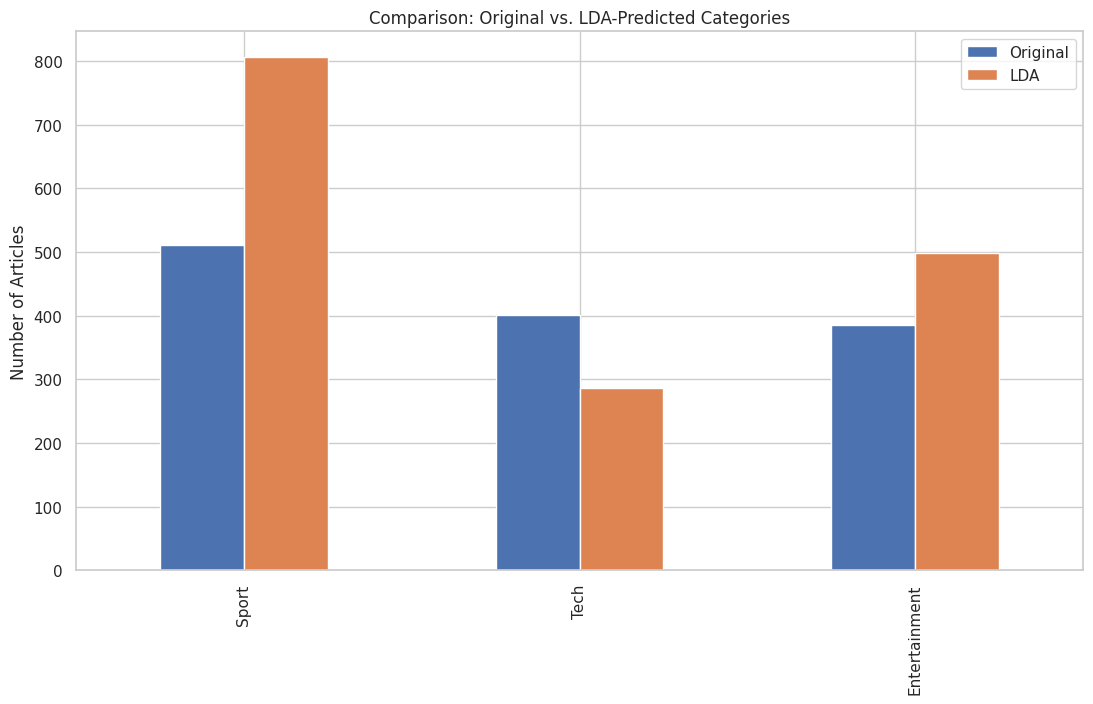

In [134]:
aggregate_plot(result_df)

In [135]:
print(f'The LDA model has an accuracy of {round(model_accuracy(result_df),2)}%')

The LDA model has an accuracy of 16.81%


In [136]:
prf1_m2 = precision_recall_f1(result_df)
prf1_m2

Topic     Recall  Precision   F1_Score
0  Entertainment  49.137931  22.845691  31.190150
1          Sport  42.500000  21.091811  28.192371
2           Tech  34.351145  31.468531  32.846715

*   It can be observed that implementation of the LDA model using Tfidf Vectorizer lowered the model accuracy. The model tended to over-determine the Entertainment Topic, hence the lower score of F1
*   The most frequent words in each topic is plotted in the next section.

##### 2.5 Topic-wise analysis - Term distributions for each Topic

In [137]:
def top_n_terms(tfidf_vectorizer, lda_model, n=10):
    """
    Returns the top n terms per topic from an LDA model using a TF-IDF vectorizer.
    """
    words = tfidf_vectorizer.get_feature_names_out()
    topics = {}

    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[:-n - 1:-1]
        top_terms = [words[i] for i in top_indices]
        topics[f"Topic {topic_idx}"] = top_terms

    return topics


In [138]:
df.head()

Unnamed: 0                              Title  \
0           0   India calls for fair trade rules   
1           1  Sluggish economy hits German jobs   
2           2   Indonesians face fuel price rise   
3           3  Court rejects $280bn tobacco case   
4           4   Dollar gains on Greenspan speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Description  \
0                                                                                                                                                                                                                                                                 india attend g7 meet seven lead industrialis nation friday unlik cow newcom status london thursday ahead meet india financ minist lash restrict trade polici g7 nation object subsidi agricultur make hard develop nation like india compet also call reform unit nation world bank imf palaniappan chidambaram india financ minist argu organis need take account chang world order given india china integr global economi issu globalis term engag globalis mr chidambaram attend g7 meet part g20 group nation account two third world popul confer develop enterpris host uk financ minist gordon brown friday favour float exchang rate help countri cope econom shock flexibl exchang rate one channel absorb posit negat shock told confer india along china brazil south africa russia invit take part g7 meet take place london friday saturday china expect face renew pressur abandon fix exchang rate g7 nation particular us blame surg cheap chines export countri tri use fix exchang rate wish make judgement mr chidambaram separ imf warn thursday india budget deficit larg would hamper countri econom growth forecast around 65 year march 2005 year march 2004 indian economi grew 85   
1                                                                                                                                                                                                                                     number peopl work europ largest economi risen tenth straight month growth remain stubborn slow german unemploy rose 7000 novemb 4464 million peopl 108 workforc season adjust rise show smaller rise expect govern measur encourag job creation began take effect offici stagnant growth still stifl job market clear sign reviv domest demand frankjuergen weis head feder labour agenc statement growth 01 third quarter still insuffici deliv posit momentum labour market high oil price soar euro damag competit export also negat effect brunt unemploy still felt eastern part germani rate 188 unemploy stuck 4 million 

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_data = tfidf_vectorizer.fit_transform(data['Description'])  # or whatever your text column is

top_words_tfidf = top_n_terms(tfidf_vectorizer, best_lda_model_tfidf, 100)

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(words, title="Word Cloud"):
    """
    Plots a word cloud from a list of words.
    """
    # Convert list of words to a single string
    text = " ".join(words)

    # Create and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()


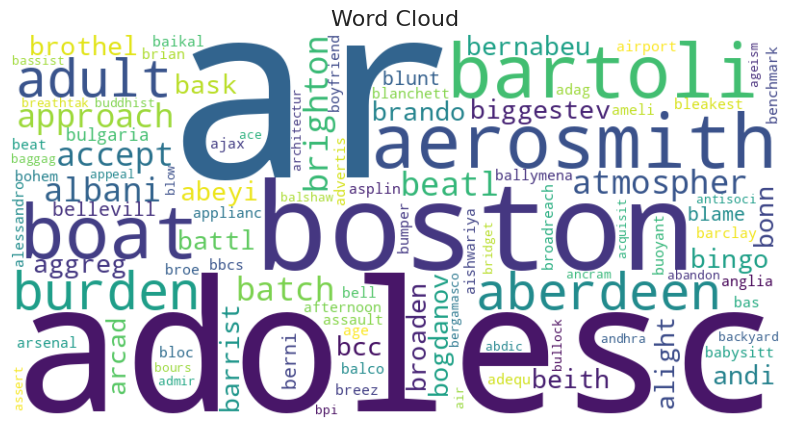

In [141]:
plot_wordcloud(top_words_tfidf['Topic 0'])


*   Looking at the word distributions, it can be concluded that this is the **Politics** Topic

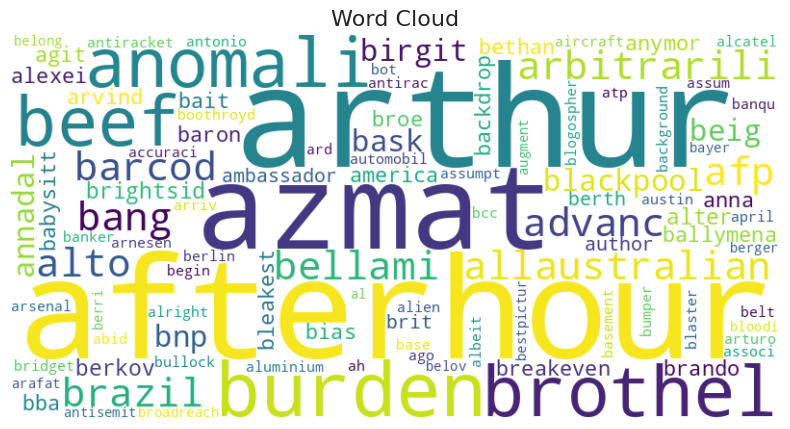

In [142]:
plot_wordcloud(top_words_tfidf['Topic 1'])


*   Looking at the word distributions, it can be concluded that this is the **Sport** Topic

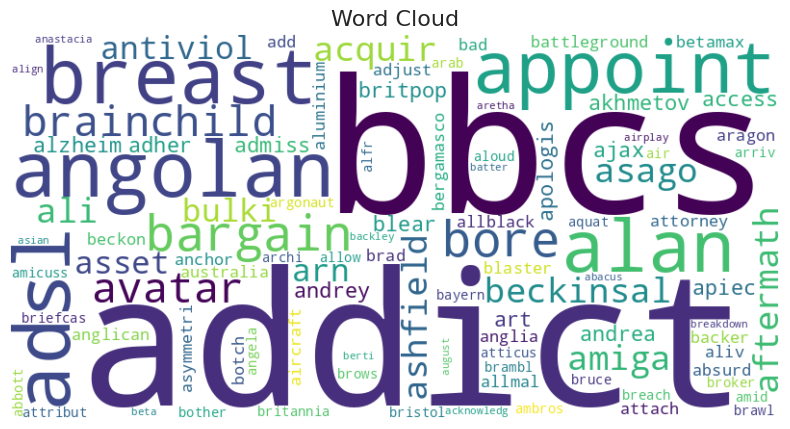

In [143]:
plot_wordcloud(top_words_tfidf['Topic 2'])


*   Looking at the word distributions, it can be concluded that this is the **Tech** Topic

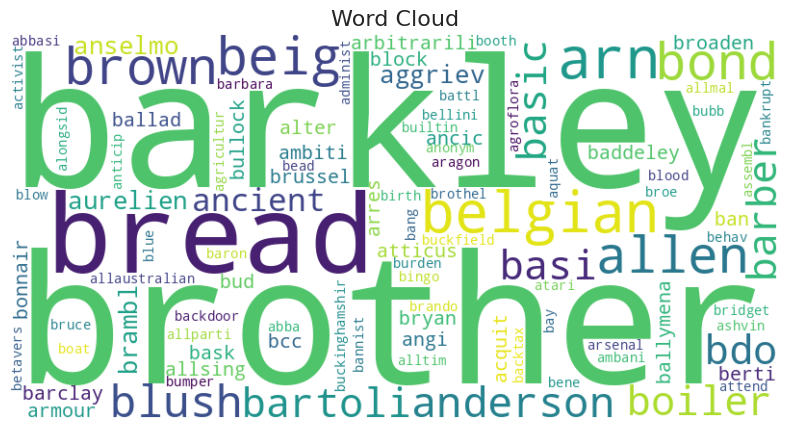

In [144]:
plot_wordcloud(top_words_tfidf['Topic 3'])


*   Looking at the word distributions, it can be concluded that this is the **Entertainment** Topic

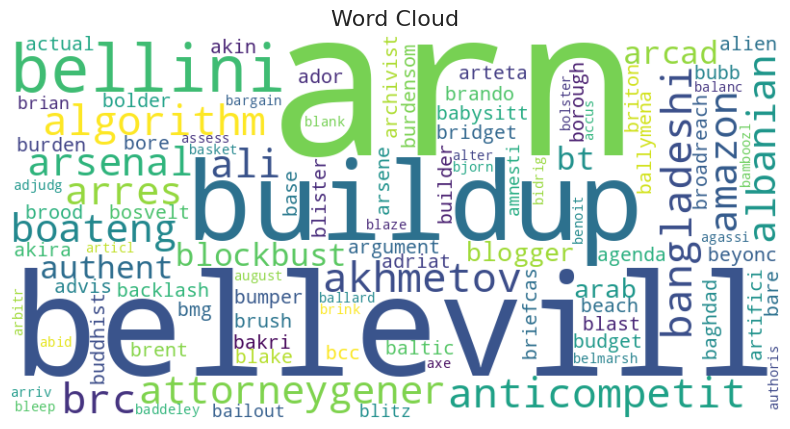

In [145]:
plot_wordcloud(top_words_tfidf['Topic 4'])


*   Looking at the word distributions, it can be concluded that this is the **Business** Topic

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

*   **Perplixity and Log-likelihood score**:
  *   Perplexity, in the context of LDA, is a measure of how well the model is able to predict unseen documents. A lower perplexity score indicates that the model is better at predicting unseen documents.
  *   Log-likelihood is a measure of the capability of the model to explain the data. In general, a higher Log-likelihood and lower Perplexity is indicative of a good Topic Modeling Algorithm

*   However, these alone are not perfect metrics for evaluation of a Topic Modeling Algorithm. Since we are provided the original categories as an input, the metrics generally used for a Classification model could be used for evaluation along with the above two

*   **Accuracy** is the first of these metrics used for evaluation. Accuracy can be defined as the total number of articles correctly categorised by the model in proportion to the total articles categorised. **Precision** is a good metric to use if the priority is to avoid mis-categorisation of articles into a particular category when they originally don't. It measures the accuracy of identifying if the articles truly belong to a particular category. **Recall** is a good metric to use if the priority to avoid missing any articles which originally belong to a particular category
*   Since the client has not provided any hierarchy within the categories themselves, all the categories are considered equal in importance, and hence the **F1 Score** is primarily focused on, to balance the trade-off between Precision and Recall
  *    For example, in Model 1 for the **Politics** topic, **Recall** was as high as 99% indicating how good the model is in categorising articles originally belonging to Politics. But the fact that the model has also categorised articles originally in other categories as Politics is captured by **Precision**, which is only ~82%. Hence, the **F1 Score** is used to take into account both these metrics, **especially since no prior hierarchy between topics is a given**

*   In summary, **Perplexity**, **Log-likelihood**, **Accuracy** and **F1 Score** are primarily focused on to assess the power of the Topic Modeling Algorithm








### 2. Which ML model did you choose from the above created models as your final prediction model and why?

*   Based on an analysis of the above models, the first model - **LDA with CountVectorizer** - is chosen as the final prediction model.
*   On a simple view of the 3rd model using the Latent Semantic Analysis, it can be observed that the model - for both TFIDF and Count Vectorizers to tokenise the input dataset - over-predicts for one particular topic over the other four. This is highly inaccurate, and hence this model is dropped
*   On comparison between the other two models, the following are the evaluation metrics of the two:

In [146]:
print(f"Number of documents: {len(df)}")
print(df[:2])  # See a sample


Number of documents: 2225
   Unnamed: 0                              Title  \
0           0   India calls for fair trade rules   
1           1  Sluggish economy hits German jobs   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [147]:
print('Model 1: LDA with Count Vectorizer')
print(f"Log likelihood Score for the LDA model: {log_likelihood_m1}")
print(f"Perplixity of the LDA model: {perplexity_m1}")
print(f"Accuracy of the LDA model {round(model_accuracy(result_df),2)}%")
print(f"\n{prf1_m1}")

print("\n\nModel 2: LDA with TFIDF Vectorizer")
print(f"Log-likelihood Score for the LDA model: {log_likelihood_m2}")
print(f"Perplexity of the LDA model: {perplexity_m2}")
print(f"Accuracy of the LDA model {round(model_accuracy(result_df),2)}%")
print(f"\n{prf1_m2}")

Model 1: LDA with Count Vectorizer
Log likelihood Score for the LDA model: -477760.247472721
Perplixity of the LDA model: 763.0653436674005
Accuracy of the LDA model 16.81%

   Topic     Recall  Precision   F1_Score
0  Sport  62.698413  32.610939  42.905635
1   Tech  50.750000  16.639344  25.061728


Model 2: LDA with TFIDF Vectorizer
Log-likelihood Score for the LDA model: -32242.967206296707
Perplexity of the LDA model: 2065.2156197910394
Accuracy of the LDA model 16.81%

           Topic     Recall  Precision   F1_Score
0  Entertainment  49.137931  22.845691  31.190150
1          Sport  42.500000  21.091811  28.192371
2           Tech  34.351145  31.468531  32.846715


It can be observed that:
*   Model 1 has a lower score of **Perplexity** than Model 2. Hence, it is deemed to be better at categorising unseen textual data.
*   Model 2 has a higher **Log-likelihood** score than Model 1. While Model 2 scores better in this metric, the other metrics below are worth observing
*   Model 1 has a much higher model **Accuracy** than Model 2 (higher by about ~10%)
*   Model 1 has in general, much better **Precision** and **Recall** for each topic than Model 2. While Model 2 scores a very high Precision in **Entertainment** Topic, it has very low recall. The **F1 Score** is much greater for Model 1 in almost every topic - except in **Business** and **Politics** category where it is almost the same

Based on the above results, Model 1 - LDA with CountVectorizer - is the obvious choice for Topic Modeling of this data.

Thus, **there is no sufficient proof to reject the Null Hypotheses** that CountVectorizer is a better choice than TFIDFVectorizer for tokenising data to be input into an LDA model.

# **Conclusion**

Some of the sectional conclusions from the project are:
*   Encoding errors like UnicodeError and Parsererror were encountered when reading some of the News article txt files. Exception handling was implemented for these articles to be read properly
*   In textual pre-processing, many further stopwords could be removed for further optimising the model. Words like "use", "go" etc. Words like "us" needs to be handled carefully as it can also mean the "United States"
*   The process of stemming was not implemented for pre-processing. Stemming simply chops off the end of a word to reduce it to its root form, whereas lemmatization considers the context and morphology of the word to reduce it to its base form. This is particularly important in topic modeling, where the goal is to identify the hidden topics in a corpus of texts. Since topics can often be conveyed through the nuances of language and the context in which words are used, it is important to use a method that preserves as much of the original meaning as possible
*   A Null hypotheses was established, for the choice between a CountVectorizer and TFIDFVectorizer for data tokenisation. It was found that the CountVectorizer is suitable for tokenising input textual data for LDA models. This is because LDA is a probabilistic model that models the word count distribution in a document and the topic distribution across documents. CountVectorizer converts text into an array of word counts, which is an ideal input for an LDA model
*   After implementing the LDA and LSA models, it was found that the LDA model (with Count Vectorizer used for tokenisation) indeed fared much better than the LSA model in categorising the underlying topics in the corpus of articles. The model accuracy was as high as 93%. On looking at the word distributions for each topic, a correlation between the most frequent words and the topics could be easily identified.

# **Future Scope**

Some areas where future work could be extended on this project are:
*   **Refining the stopwords removal further**, as has been discussed above in the **Conclusions** section
*   **Tuning of further Hyperparameters**. In the project, the optimum value of the number of topics as a hyperparameter was tuned. Further hyperparameters like *solver*, *store_covariance*, *tol* etc could be optimised sed to develop the model further. Random Search of Bayesian Search could be implemented to tackle the computational cost.
*   Many other models like the Non Negative Matrix Factorization (NMF), Parallel Latent Dirichlet Allocation (PLDA) and Pachinko Allocation Model (PAM) exist for Topic Modeling. Various such models could be implemented and their performance compared to select the best model in this context.
*   **Topic evolution with time**: BBC articles are produced every year and in abundance. Future work can also include analysing how the identified topics have evolved over time and exploring any patterns or trends.

*As a final note, thank you for joining me on this journey of exploring BBC News articles through topic modeling. It was a pleasure to share this experience with you!*

In [149]:
import pickle

# Example: save result_df and lda_model
with open('topic_modelling.pkl', 'wb') as f:
    pickle.dump({
        'result_df': result_df,
        'lda_model': lda_model,
        'corpus': corpus,
        'dictionary': dictionary,
        'tokenised_data': tokenised_data
    }, f)


In [150]:
from google.colab import files
files.download('topic_modelling.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>